In [2]:
pip install scikit-fuzzy


In [3]:
conda install -c conda-forge scikit-fuzzy



Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: unrecognized arguments: scikit-fuzzy


In [4]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [5]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [7]:
petal_length = ctrl.Antecedent(np.arange(0, 7, 0.1), 'petal_length')
sep_width = ctrl.Antecedent(np.arange(1.5, 5.0, 0.1), 'sep_width')

In [8]:
flower_cl = ctrl.Consequent(np.arange(0, 3, 0.1), 'flower_cl')

In [9]:
petal_length['small'] = fuzz.trimf(petal_length.universe, [0, 1.5, 3.2])
petal_length['medium'] = fuzz.trimf(petal_length.universe, [3, 4.2, 5])
petal_length['long'] = fuzz.trimf(petal_length.universe, [4.5, 6.2, 7])


In [10]:
sep_width['narrow'] = fuzz.trimf(sep_width.universe, [1.5, 2.4, 3])
sep_width['normal'] = fuzz.trimf(sep_width.universe, [2.6, 3.2, 3.8])
sep_width['broad'] = fuzz.trimf(sep_width.universe, [3.5, 4.5, 5])

In [11]:
flower_cl['setosa'] = fuzz.trimf(flower_cl.universe, [0, 0, 1])
flower_cl['versicolor'] = fuzz.trimf(flower_cl.universe, [0.8, 1.5, 2.1])
flower_cl['virginica'] = fuzz.trimf(flower_cl.universe, [1.8, 2.5, 3])

C:\Users\Shrut\anaconda3\New folder\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


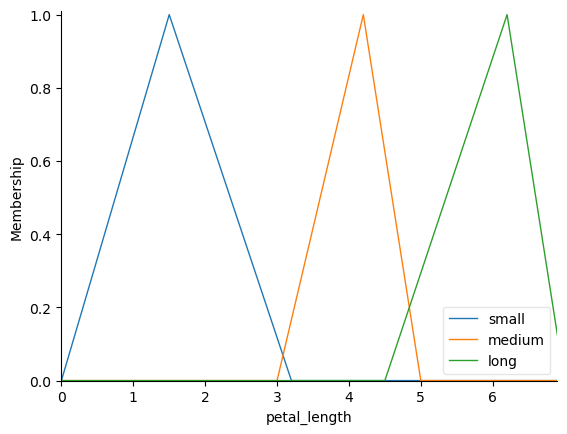

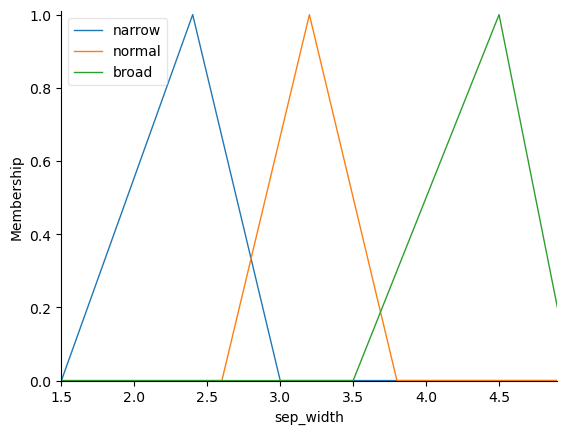

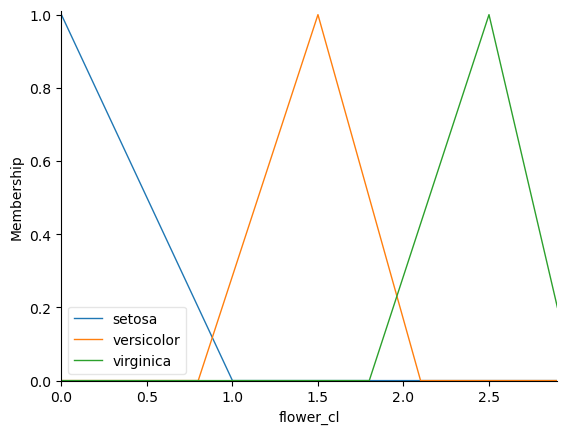

In [12]:
petal_length.view()
sep_width.view()
flower_cl.view()

In [13]:
rule1 = ctrl.Rule(petal_length['small'] & sep_width['broad'], flower_cl['setosa'])
rule2 = ctrl.Rule(petal_length['medium'] & sep_width['normal'], flower_cl['versicolor'])
rule3= ctrl.Rule(petal_length['long'] & sep_width['narrow'], flower_cl['virginica'])

In [14]:
iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
iris_sim = ctrl.ControlSystemSimulation(iris_ctrl)

In [15]:
iris_sim.input['petal_length'] = 2.8
iris_sim.input['sep_width'] = 4.1
iris_sim.compute()

Approximate fuzzy flower class: 0.44


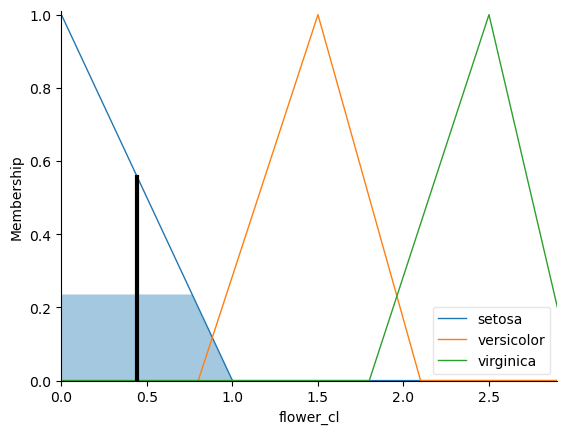

In [16]:
print(f"Approximate fuzzy flower class: {iris_sim.output['flower_cl']:.2f}")
flower_cl.view(sim=iris_sim)

In [17]:
import matplotlib.pyplot as plt

In [18]:
petal_length = iris_df['petal length (cm)'].values
x = np.arange(min(petal_length)-0.5, max(petal_length)+0.5, 0.1)

In [19]:
small_petal = fuzz.trapmf(x, [0, 0, 1.5, 3])
medium_petal = fuzz.trapmf(x, [2.5, 3.5, 4.5, 5.5])
long_petal = fuzz.trapmf(x, [4.5, 5.5, 6.9, 7.0])

In [20]:
mf_to_defuzz = medium_petal

In [21]:
defuzz_centroid = fuzz.defuzz(x, mf_to_defuzz, 'centroid')
defuzz_bisector = fuzz.defuzz(x, mf_to_defuzz, 'bisector')
defuzz_mom = fuzz.defuzz(x, mf_to_defuzz, 'mom')
defuzz_som = fuzz.defuzz(x, mf_to_defuzz, 'som')
defuzz_lom = fuzz.defuzz(x, mf_to_defuzz, 'lom')

In [22]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mf_to_defuzz, i) for i in xvals]

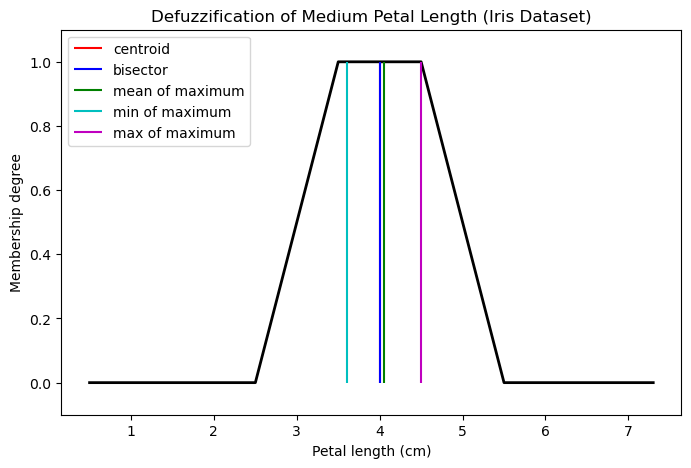

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(x, mf_to_defuzz, 'k', linewidth=2)
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.xlabel('Petal length (cm)')
plt.ylabel('Membership degree')
plt.title('Defuzzification of Medium Petal Length (Iris Dataset)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()

In [24]:
for name, val in zip(labels, xvals):
    print(f"{name}: {val:.2f} cm")

centroid: 4.00 cm
bisector: 4.00 cm
mean of maximum: 4.05 cm
min of maximum: 3.60 cm
max of maximum: 4.50 cm


In [25]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.datasets import load_iris
import pandas as pd

In [26]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
xpts = df['petal length (cm)'].values
ypts = df['petal width (cm)'].values


In [27]:
labels = iris.target


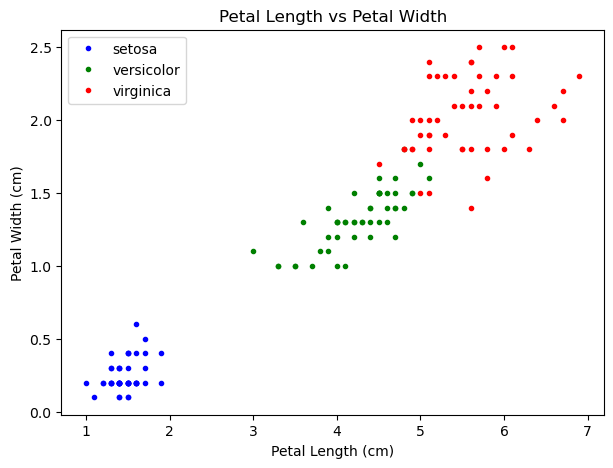

In [28]:
colors = ['b', 'g', 'r']
fig, ax = plt.subplots(figsize=(7,5))
for label in range(3):
    ax.plot(xpts[labels == label], ypts[labels == label], '.', color=colors[label], label=iris.target_names[label])
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('Petal Length vs Petal Width')
ax.legend()
plt.show()

In [29]:
data = np.vstack((xpts, ypts))

In [30]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=3, m=2, error=0.005, maxiter=1000, init=None)

In [31]:
cluster_labels = np.argmax(u, axis=0)

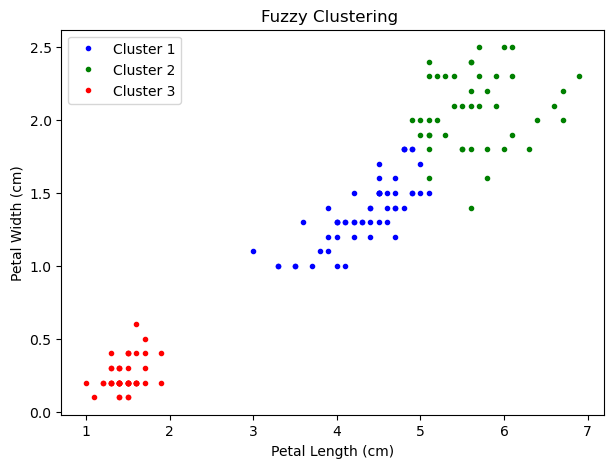

In [32]:
fig, ax = plt.subplots(figsize=(7,5))
for cluster in range(3):
    ax.plot(xpts[cluster_labels == cluster], ypts[cluster_labels == cluster], '.', color=colors[cluster], label=f'Cluster {cluster+1}')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('Fuzzy Clustering ')
ax.legend()
plt.show()

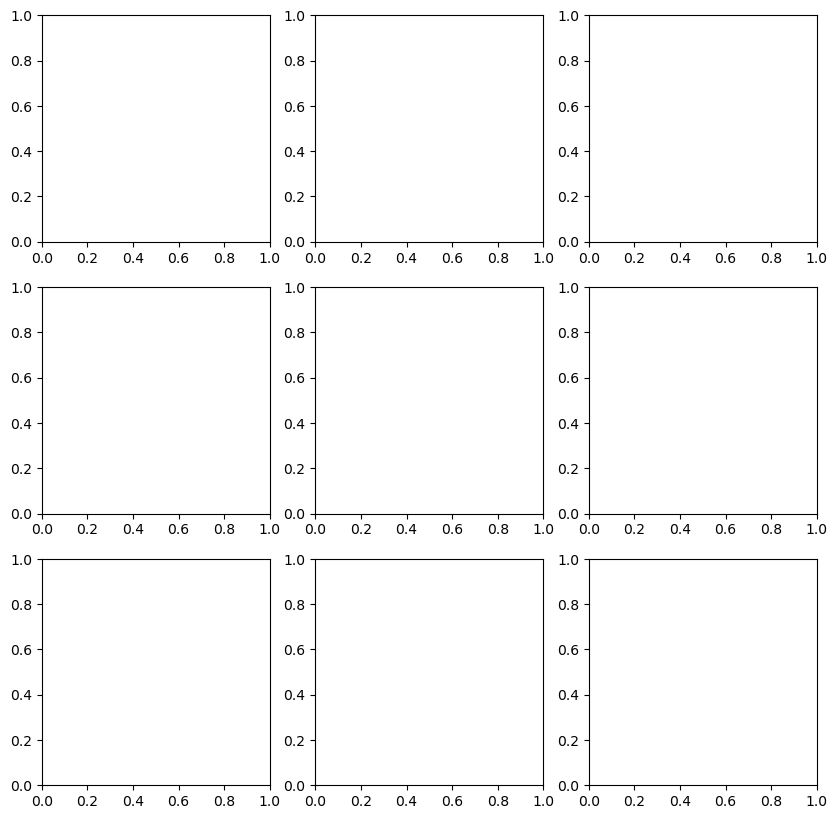

In [33]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


xpts = df['petal length (cm)'].values
ypts = df['petal width (cm)'].values
alldata = np.vstack((xpts, ypts))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=1000, init=None)


In [34]:
fpcs.append(fpc)

In [86]:
cluster_membership = np.argmax(u, axis=0)
    

In [87]:
 for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j % len(colors)])
    
    
 for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
    
 ax.set_title(f'Centers = {ncenters}, FPC = {fpc:.2f}')
 ax.axis('off')

fig1.tight_layout()
plt.show()


for n, fpc_val in enumerate(fpcs, 2):
    print(f"Centers={n}, FPC={fpc_val:.3f}")

Centers=2, FPC=0.613


In [88]:
num_centers = np.arange(2, 11)


In [89]:
fpcs = []

In [90]:
for ncenters in num_centers:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=1000, init=None)
    fpcs.append(fpc)


In [91]:
fpcs = np.array(fpcs)


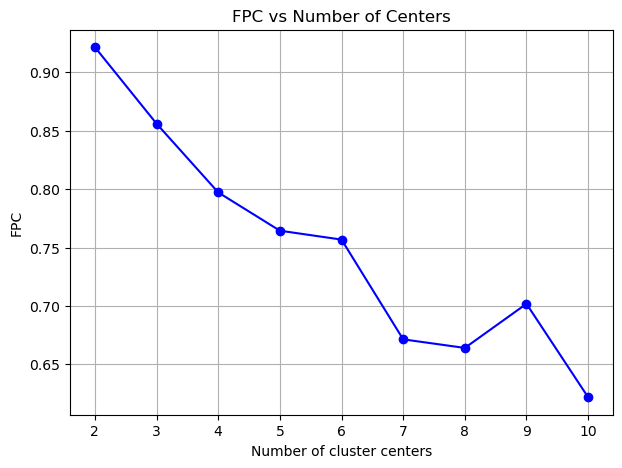

In [93]:
fig2, ax2 = plt.subplots(figsize=(7,5))
ax2.plot(num_centers, fpcs, marker='o', linestyle='-', color='b')
ax2.set_xlabel("Number of cluster centers")
ax2.set_ylabel("FPC")
ax2.set_title("FPC vs Number of Centers")
ax2.grid(True)
plt.show()

In [94]:
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, c=3, m=2, error=0.005, maxiter=1000)

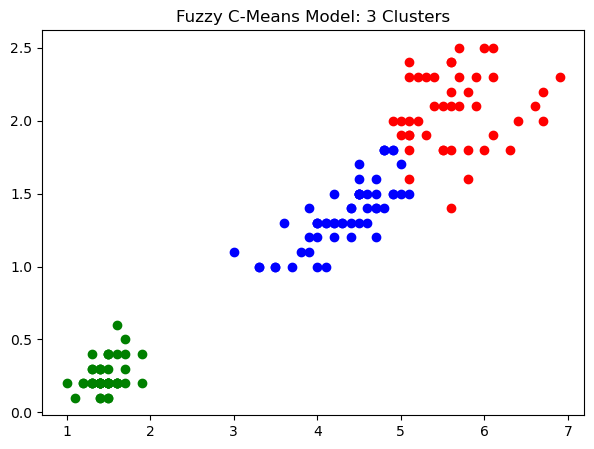

In [96]:
fig2, ax2 = plt.subplots(figsize=(7,5))
ax2.set_title('Fuzzy C-Means Model: 3 Clusters')
colors = ['b', 'g', 'r']

for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j],
             'o', color=colors[j], label=f'Cluster {j+1}')

In [97]:
print("Cluster centers")
for i, center in enumerate(cntr):
    print(f"Cluster {i+1}: {center}")

Cluster centers
Cluster 1: [4.32697788 1.36525311]
Cluster 2: [1.47111992 0.24985805]
Cluster 3: [5.66093574 2.06858395]


In [98]:
newdata = np.random.uniform(low=[xpts.min(), ypts.min()],
                            high=[xpts.max(), ypts.max()],
                            size=(1100, 2))

In [99]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, m=2, error=0.005, maxiter=1000)

In [100]:
cluster_membership = np.argmax(u, axis=0)

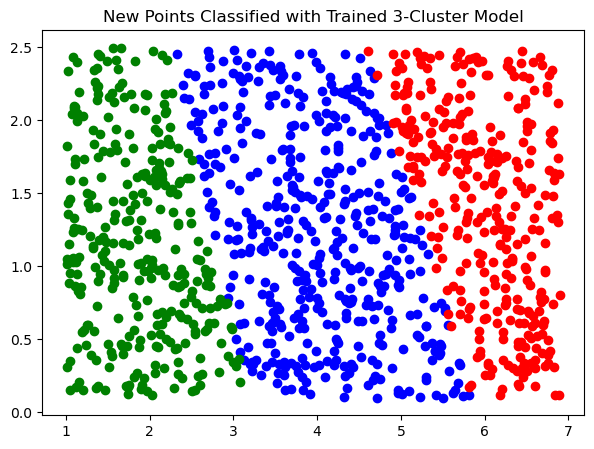

In [102]:
fig3, ax3 = plt.subplots(figsize=(7,5))
colors = ['b', 'g', 'r']
ax3.set_title('New Points Classified with Trained 3-Cluster Model')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1],
             'o', color=colors[j], label=f'Cluster {j+1}')

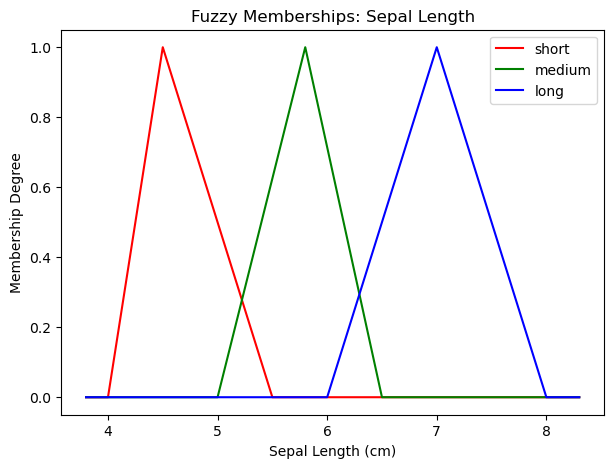

In [103]:
x = np.arange(df['sepal length (cm)'].min()-0.5, df['sepal length (cm)'].max()+0.5, 0.1)

short = fuzz.trimf(x, [4, 4.5, 5.5])
medium = fuzz.trimf(x, [5, 5.8, 6.5])
long = fuzz.trimf(x, [6, 7, 8])

plt.figure(figsize=(7,5))
plt.plot(x, short, 'r', label='short')
plt.plot(x, medium, 'g', label='medium')
plt.plot(x, long, 'b', label='long')
plt.title('Fuzzy Memberships: Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

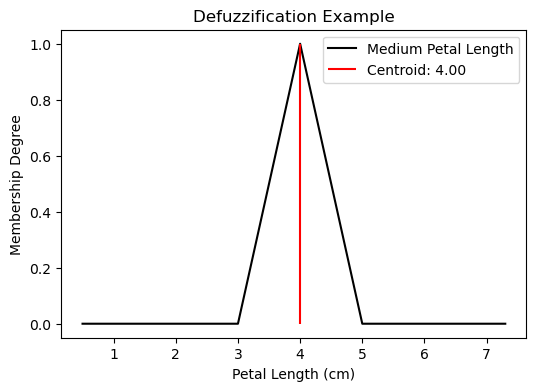

In [104]:
petal_length = df['petal length (cm)'].values
x = np.arange(min(petal_len)-0.5, max(petal_len)+0.5, 0.1)

medium_petal = fuzz.trimf(x, [3, 4, 5])
centroid = fuzz.defuzz(x, medium_petal, 'centroid')

plt.figure(figsize=(6,4))
plt.plot(x, medium_petal, 'k', label='Medium Petal Length')
plt.vlines(centroid, 0, 1, color='r', label=f'Centroid: {centroid:.2f}')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Membership Degree')
plt.title('Defuzzification Example')
plt.legend()
plt.show()

In [109]:
sepal_length = ctrl.Antecedent(np.arange(4, 8, 0.1), 'sepal_len')
petal_length = ctrl.Antecedent(np.arange(1, 7, 0.1), 'petal_len')
flower_size = ctrl.Consequent(np.arange(0, 11, 1), 'flower_size')
flower_size['small'] = fuzz.trimf(flower_size.universe, [0, 2, 5])
flower_size['large'] = fuzz.trimf(flower_size.universe, [5, 8, 10])
sepal_length['short'] = fuzz.trimf(sepal_length.universe, [4, 4.5, 5.5])
sepal_length['long'] = fuzz.trimf(sepal_length.universe, [5, 6, 7])
petal_length['small'] = fuzz.trimf(petal_length.universe, [1, 2, 3])
petal_length['large'] = fuzz.trimf(petal_length.universe, [3, 5, 6])

rule1 = ctrl.Rule(sepal_length['short'] & petal_length['small'], flower_size['small'])
rule2 = ctrl.Rule(sepal_length['long'] | petal_length['large'], flower_size['large'])


flower_ctrl = ctrl.ControlSystem([rule1, rule2])
flower_sim = ctrl.ControlSystemSimulation(flower_ctrl)
flower_sim.input['sepal_len'] = 5.2
flower_sim.input['petal_len'] = 4.5
flower_sim.compute()

Predicted flower size (fuzzy): 7.65


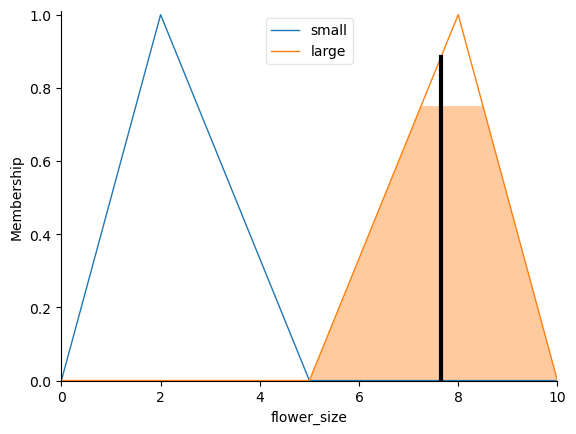

In [110]:
print(f"Predicted flower size (fuzzy): {flower_sim.output['flower_size']:.2f}")
flower_size.view(sim=flower_sim)